In [1]:
import pandas as pd

df = pd.read_csv("edlich-kmeans-A0.csv")
df.head(10)

,V1,V2,V3
0,-5.340236,4.747246,3.823326
1,-9.587065,-3.434466,9.701839
2,-8.385012,-3.902794,8.514620
3,5.708226,2.658575,5.404482
4,-7.431665,-4.390251,9.003216
5,5.028509,9.047695,-8.548437
6,6.372196,4.459940,4.369358
7,-8.355252,-3.516956,7.162714
8,-3.405266,2.281427,-7.631172
9,5.621561,3.431056,4.666574


# A) What is the best k?

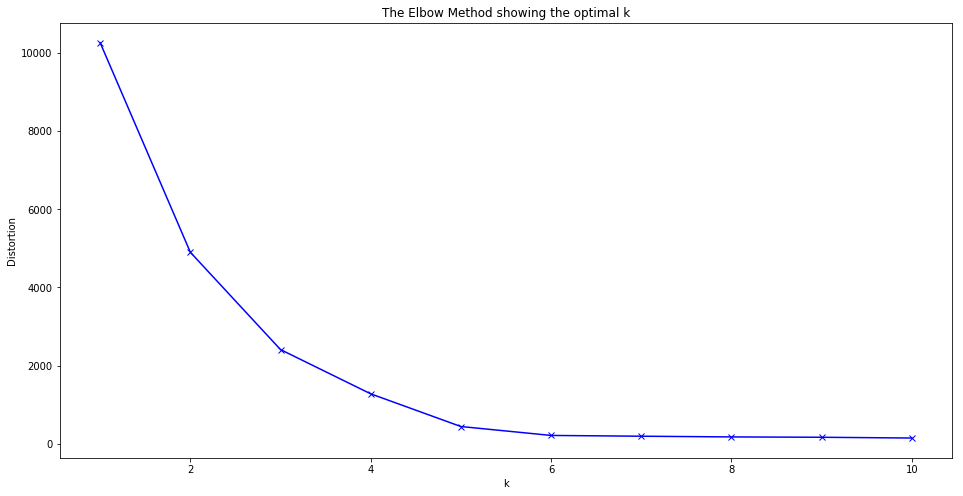

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

distortions = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [3]:
distortions

[10260.706784799486,
 4899.629957493973,
 2409.5098787388397,
 1278.1820569817,
 441.62328912304423,
 213.75035273896327,
 193.70273710209202,
 175.60454185207402,
 166.8963514216803,
 147.22287736080162]

determined value for optimal k is 6

In [4]:
k = 6

# B) Can you print the clustering vector?




print labels

In [5]:
#Import required module
from sklearn.cluster import KMeans

#Initialize the class object
kmeans = KMeans(n_clusters= k)

#predict the labels of clusters.
label = kmeans.fit_predict(df)

print(label)

[3 0 0 2 0 4 2 0 1 2 0 1 2 4 3 0 1 4 3 3 0 1 3 0 0 5 1 1 1 4 1 1 4 4 0 3 4
 3 1 0 4 4 4 3 4 0 2 2 4 2 2 4 1 1 2 2 3 2 0 4 2 3 5 2 4 2 3 3 3 4 4 2 1 2
 2 1 0 4 2 1 1 4 0 3 3 0 3 3 3 2 1 1 1 0 5 2 1 4 3 3]


Cluster center-coordinates:

In [6]:
cluster_centers = pd.DataFrame( kmeans.cluster_centers_, columns=["x", "y", "z"] )

print(cluster_centers)

           x         y         z
0  -8.532420 -3.554015  8.968577
1  -2.403317  2.147529 -8.023789
2   5.882405  3.590739  4.605080
3  -5.106915  5.601798  3.719569
4   3.665368  8.910750 -9.065798
5  10.399197 -3.204062  9.163650


<Figure size 432x288 with 0 Axes>

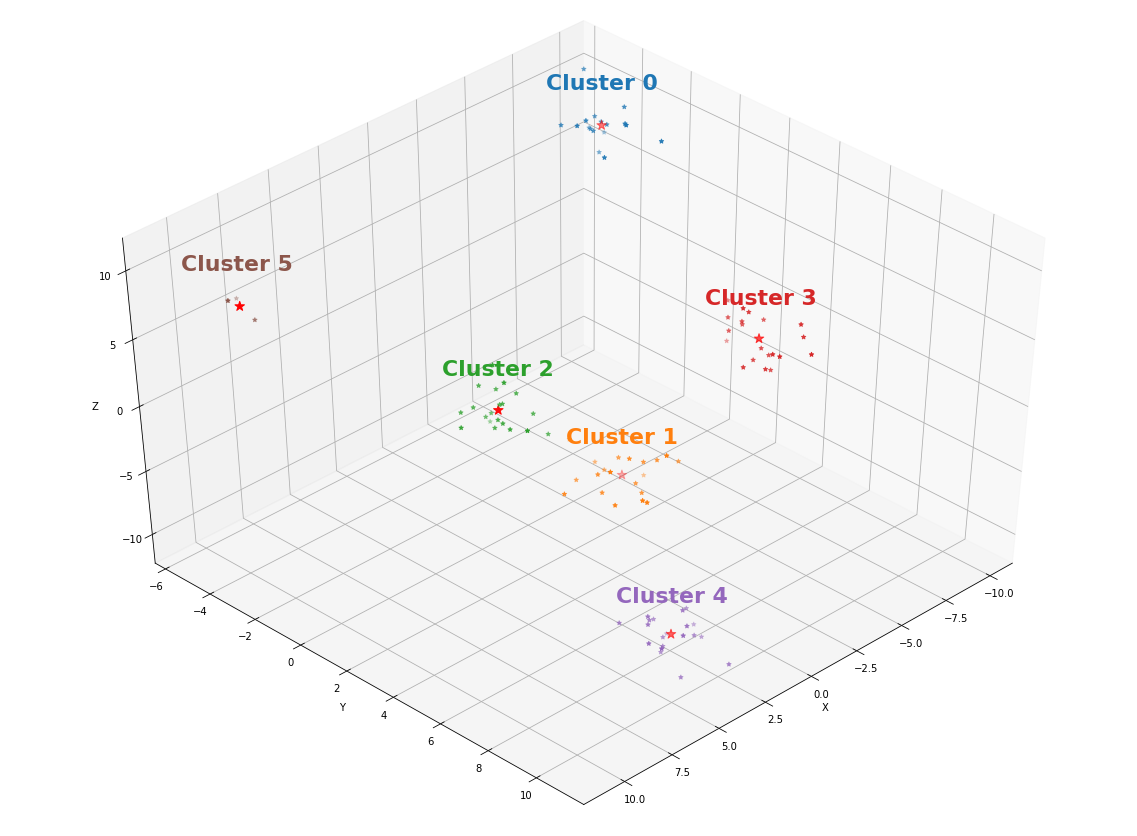

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

df["cluster"] = kmeans.labels_

#define colormap
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig = plt.figure()
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

#plot cluster center points
ax.scatter(cluster_centers.iloc[:,0], cluster_centers.iloc[:,1], cluster_centers.iloc[:,2], c='r', marker='*', s=100)

#plot clusters
for cluster in range(0,k):
    selected_cluster = df.loc[df["cluster"] == cluster]    
    ax.scatter(selected_cluster.iloc[:,0], selected_cluster.iloc[:,1], selected_cluster.iloc[:,2], c=colors[cluster], marker='*')    
    ax.text(cluster_centers.iloc[cluster,0], cluster_centers.iloc[cluster,1], cluster_centers.iloc[cluster,2]+3, "Cluster {}".format(cluster), None, va='center', ha='center', color=colors[cluster], weight='bold', size='22')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.view_init(45, 45) 

plt.show()